In [ ]:
%run 1_Data_cleaning_and_EDA.ipynb

# How well can we predict test scores from only the previous year's result?

Before we perform regression on the whole set of explanatory variables, we wish to see see how well we can do with only one covariate. This would be the simplest plausible model. Examination of the correlation chart shows that the variable most strongly correlated with each year's test score is generally the previous year's test score in the same subject (we exclude other test scores from the same year and all future data because it does not make sense to use them in the context of our problem). Therefore, we conduct three linear regressions for each subject: K–1, 1–2, and 2–3.

In [2]:
regrk1, regr12, regr23 = lm.LinearRegression(), lm.LinearRegression(), lm.LinearRegression()
regmk1, regm12, regm23 = lm.LinearRegression(), lm.LinearRegression(), lm.LinearRegression()
reglk1, regl12, regl23 = lm.LinearRegression(), lm.LinearRegression(), lm.LinearRegression()
regwk1, regw12, regw23 = lm.LinearRegression(), lm.LinearRegression(), lm.LinearRegression()

In [3]:
read = data['gktreadss g1treadss g2treadss g3treadss'.split()].dropna()
math = data['gktmathss g1tmathss g2tmathss g3tmathss'.split()].dropna()
lstn = data['gktlstnss g1tlstnss g2tlstnss g3tlstnss'.split()].dropna()
word = data['gktwordss g1twordss g2twordss g3twordss'.split()].dropna()

In [4]:
regrk1.fit(read.gktreadss.values.reshape(-1, 1), read.g1treadss)
regr12.fit(read.g1treadss.values.reshape(-1, 1), read.g2treadss)
regr23.fit(read.g2treadss.values.reshape(-1, 1), read.g3treadss)

regmk1.fit(math.gktmathss.values.reshape(-1, 1), math.g1tmathss)
regm12.fit(math.g1tmathss.values.reshape(-1, 1), math.g2tmathss)
regm23.fit(math.g2tmathss.values.reshape(-1, 1), math.g3tmathss)

reglk1.fit(lstn.gktlstnss.values.reshape(-1, 1), lstn.g1tlstnss)
regl12.fit(lstn.g1tlstnss.values.reshape(-1, 1), lstn.g2tlstnss)
regl23.fit(lstn.g2tlstnss.values.reshape(-1, 1), lstn.g3tlstnss)

regwk1.fit(word.gktwordss.values.reshape(-1, 1), word.g1twordss)
regw12.fit(word.g1twordss.values.reshape(-1, 1), word.g2twordss)
regw23.fit(word.g2twordss.values.reshape(-1, 1), word.g3twordss)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In each of the four cells below, the first row of graphs shows the fitted regression line on top of a scatterplot of actual test scores. The dependent variable is on the vertical axis and the independent variable (the previous year's test score) on the horizontal axis. The second row shows the residual plots for each year, with residual values on the vertical axis and the fitted values on the horizontal axis. Coefficients of determination (R$^2$) and mean squared error (MSE) are also shown for each model.

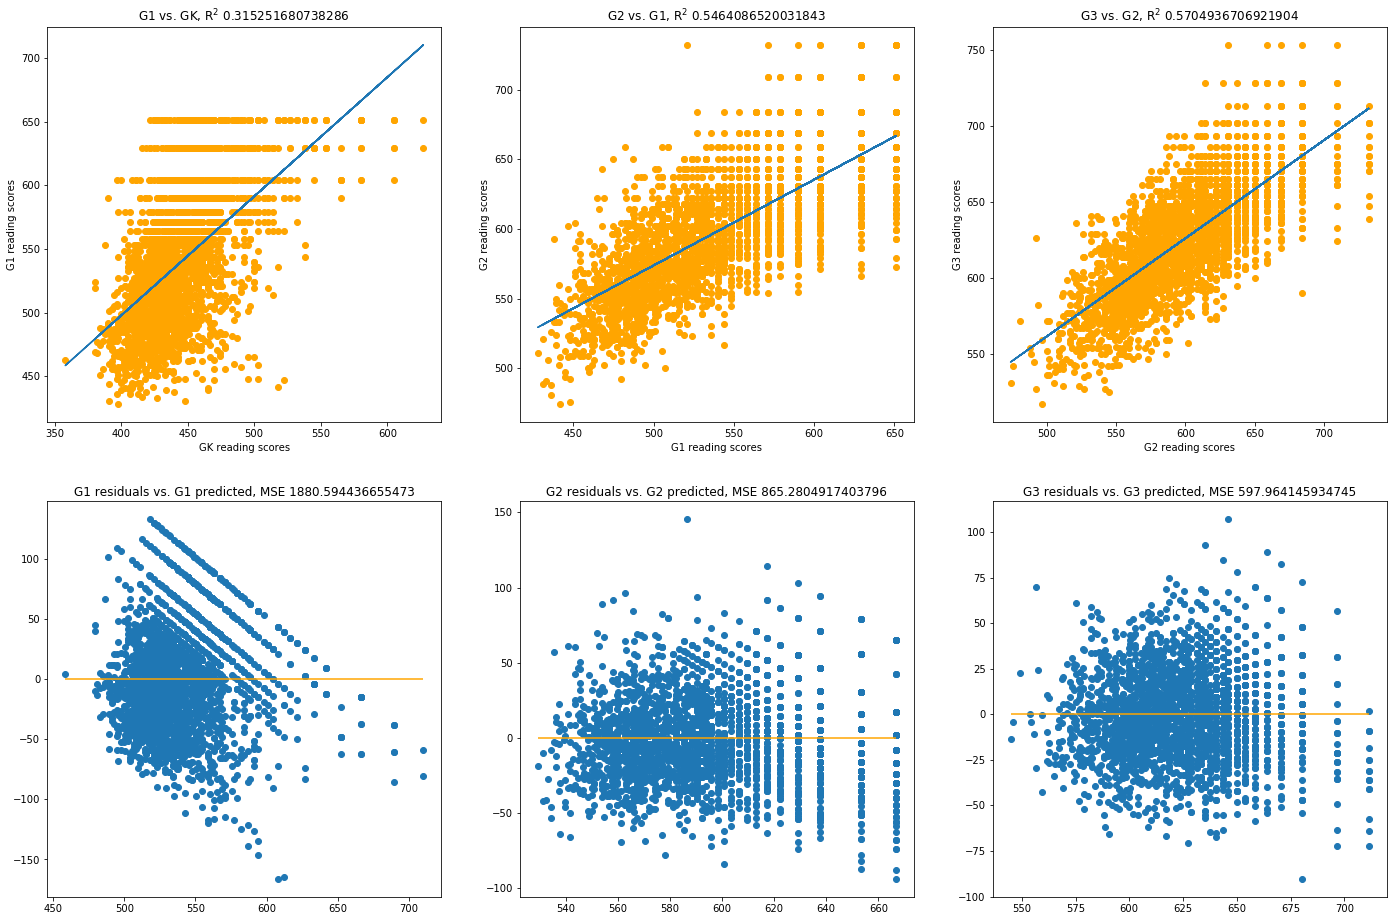

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

axes[0, 0].scatter(read.gktreadss, read.g1treadss, color='orange')
axes[0, 0].plot(read.gktreadss.values, regrk1.predict(read.gktreadss.values.reshape(-1, 1)))
axes[0, 0].set_xlabel('GK reading scores')
axes[0, 0].set_ylabel('G1 reading scores')
axes[0, 0].set_title('G1 vs. GK, R$^2$ {}'.format(regrk1.score(read.gktreadss.values.reshape(-1, 1), read.g1treadss)))

axes[0, 1].scatter(read.g1treadss, read.g2treadss, color='orange')
axes[0, 1].plot(read.g1treadss.values, regr12.predict(read.g1treadss.values.reshape(-1, 1)))
axes[0, 1].set_xlabel('G1 reading scores')
axes[0, 1].set_ylabel('G2 reading scores')
axes[0, 1].set_title('G2 vs. G1, R$^2$ {}'.format(regr12.score(read.g1treadss.values.reshape(-1, 1), read.g2treadss)))

axes[0, 2].scatter(read.g2treadss, read.g3treadss, color='orange')
axes[0, 2].plot(read.g2treadss.values, regr23.predict(read.g2treadss.values.reshape(-1, 1)))
axes[0, 2].set_xlabel('G2 reading scores')
axes[0, 2].set_ylabel('G3 reading scores')
axes[0, 2].set_title('G3 vs. G2, R$^2$ {}'.format(regr23.score(read.g2treadss.values.reshape(-1, 1), read.g3treadss)))

axes[1, 0].scatter(regrk1.predict(read.gktreadss.values.reshape(-1, 1)), (read.g1treadss - regrk1.predict(read.gktreadss.values.reshape(-1, 1))))
axes[1, 0].hlines(y = 0, xmin=regrk1.predict(read.gktreadss.values.reshape(-1, 1)).min(), xmax=regrk1.predict(read.gktreadss.values.reshape(-1, 1)).max(), color='orange')
mse = metrics.mean_squared_error(read.g1treadss, regrk1.predict(read.gktreadss.values.reshape(-1, 1)))
axes[1, 0].set_title('G1 residuals vs. G1 predicted, MSE {}'.format(mse))

axes[1, 1].scatter(regr12.predict(read.g1treadss.values.reshape(-1, 1)), (read.g2treadss - regr12.predict(read.g1treadss.values.reshape(-1, 1))))
axes[1, 1].hlines(y = 0, xmin=regr12.predict(read.g1treadss.values.reshape(-1, 1)).min(), xmax=regr12.predict(read.g1treadss.values.reshape(-1, 1)).max(), color='orange')
mse = metrics.mean_squared_error(read.g2treadss, regr12.predict(read.g1treadss.values.reshape(-1, 1)))
axes[1, 1].set_title('G2 residuals vs. G2 predicted, MSE {}'.format(mse))

axes[1, 2].scatter(regr23.predict(read.g2treadss.values.reshape(-1, 1)), (read.g3treadss - regr23.predict(read.g2treadss.values.reshape(-1, 1))))
axes[1, 2].hlines(y = 0, xmin=regr23.predict(read.g2treadss.values.reshape(-1, 1)).min(), xmax=regr23.predict(read.g2treadss.values.reshape(-1, 1)).max(), color='orange')
mse = metrics.mean_squared_error(read.g3treadss, regr23.predict(read.g2treadss.values.reshape(-1, 1)))
axes[1, 2].set_title('G3 residuals vs. G3 predicted, MSE {}'.format(mse))

plt.show()

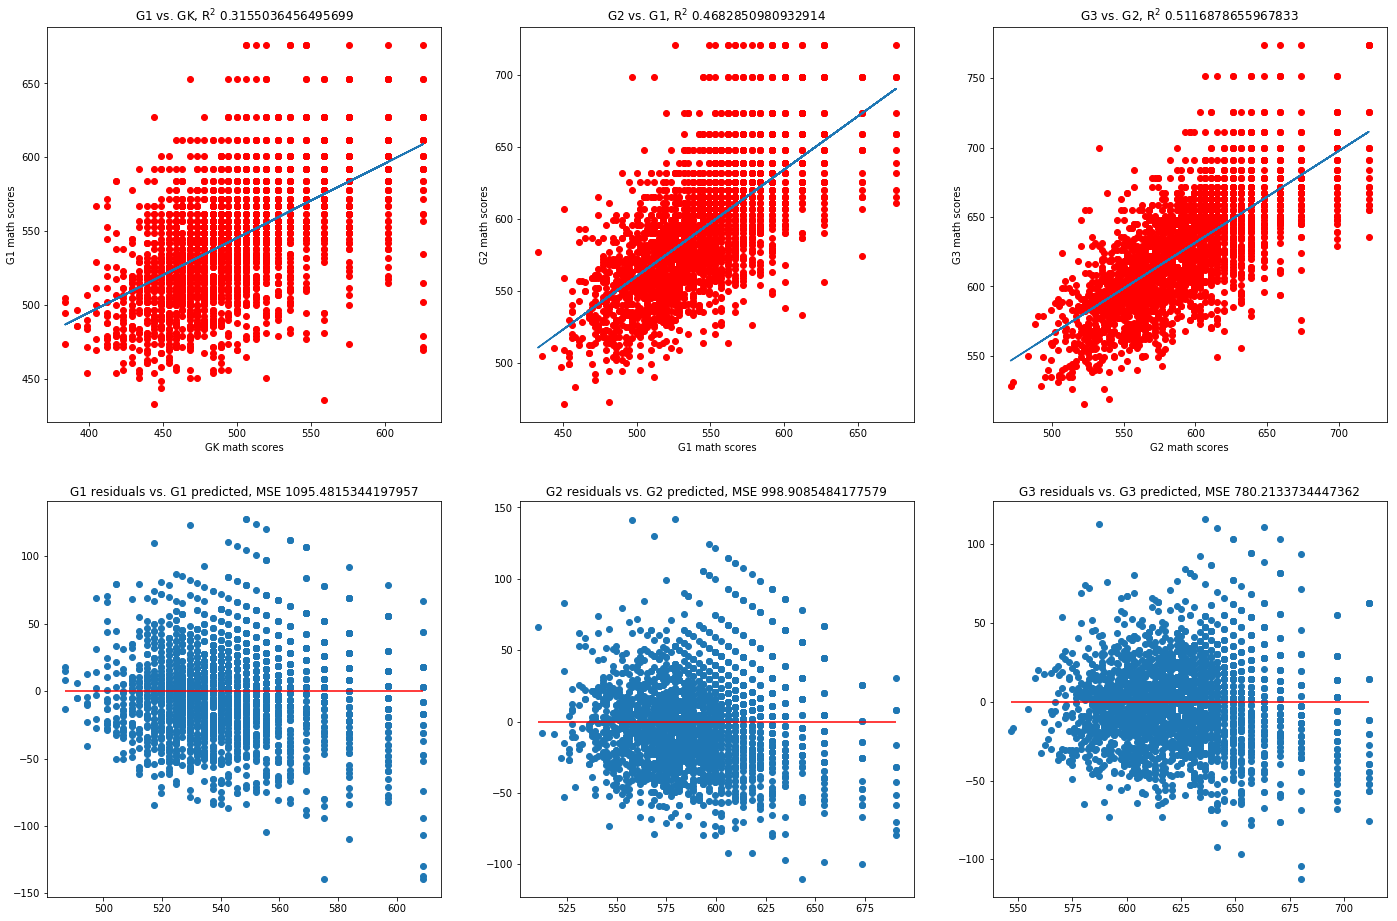

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

axes[0, 0].scatter(math.gktmathss, math.g1tmathss, color='r')
axes[0, 0].plot(math.gktmathss.values, regmk1.predict(math.gktmathss.values.reshape(-1, 1)))
axes[0, 0].set_xlabel('GK math scores')
axes[0, 0].set_ylabel('G1 math scores')
axes[0, 0].set_title('G1 vs. GK, R$^2$ {}'.format(regmk1.score(math.gktmathss.values.reshape(-1, 1), math.g1tmathss)))

axes[0, 1].scatter(math.g1tmathss, math.g2tmathss, color='r')
axes[0, 1].plot(math.g1tmathss.values, regm12.predict(math.g1tmathss.values.reshape(-1, 1)))
axes[0, 1].set_xlabel('G1 math scores')
axes[0, 1].set_ylabel('G2 math scores')
axes[0, 1].set_title('G2 vs. G1, R$^2$ {}'.format(regm12.score(math.g1tmathss.values.reshape(-1, 1), math.g2tmathss)))

axes[0, 2].scatter(math.g2tmathss, math.g3tmathss, color='r')
axes[0, 2].plot(math.g2tmathss.values, regm23.predict(math.g2tmathss.values.reshape(-1, 1)))
axes[0, 2].set_xlabel('G2 math scores')
axes[0, 2].set_ylabel('G3 math scores')
axes[0, 2].set_title('G3 vs. G2, R$^2$ {}'.format(regm23.score(math.g2tmathss.values.reshape(-1, 1), math.g3tmathss)))

axes[1, 0].scatter(regmk1.predict(math.gktmathss.values.reshape(-1, 1)), (math.g1tmathss - regmk1.predict(math.gktmathss.values.reshape(-1, 1))))
axes[1, 0].hlines(y = 0, xmin=regmk1.predict(math.gktmathss.values.reshape(-1, 1)).min(), xmax=regmk1.predict(math.gktmathss.values.reshape(-1, 1)).max(), color='r')
mse = metrics.mean_squared_error(math.g1tmathss, regmk1.predict(math.gktmathss.values.reshape(-1, 1)))
axes[1, 0].set_title('G1 residuals vs. G1 predicted, MSE {}'.format(mse))

axes[1, 1].scatter(regm12.predict(math.g1tmathss.values.reshape(-1, 1)), (math.g2tmathss - regm12.predict(math.g1tmathss.values.reshape(-1, 1))))
axes[1, 1].hlines(y = 0, xmin=regm12.predict(math.g1tmathss.values.reshape(-1, 1)).min(), xmax=regm12.predict(math.g1tmathss.values.reshape(-1, 1)).max(), color='r')
mse = metrics.mean_squared_error(math.g2tmathss, regm12.predict(math.g1tmathss.values.reshape(-1, 1)))
axes[1, 1].set_title('G2 residuals vs. G2 predicted, MSE {}'.format(mse))

axes[1, 2].scatter(regm23.predict(math.g2tmathss.values.reshape(-1, 1)), (math.g3tmathss - regm23.predict(math.g2tmathss.values.reshape(-1, 1))))
axes[1, 2].hlines(y = 0, xmin=regm23.predict(math.g2tmathss.values.reshape(-1, 1)).min(), xmax=regm23.predict(math.g2tmathss.values.reshape(-1, 1)).max(), color='r')
mse = metrics.mean_squared_error(math.g3tmathss, regm23.predict(math.g2tmathss.values.reshape(-1, 1)))
axes[1, 2].set_title('G3 residuals vs. G3 predicted, MSE {}'.format(mse))

plt.show()

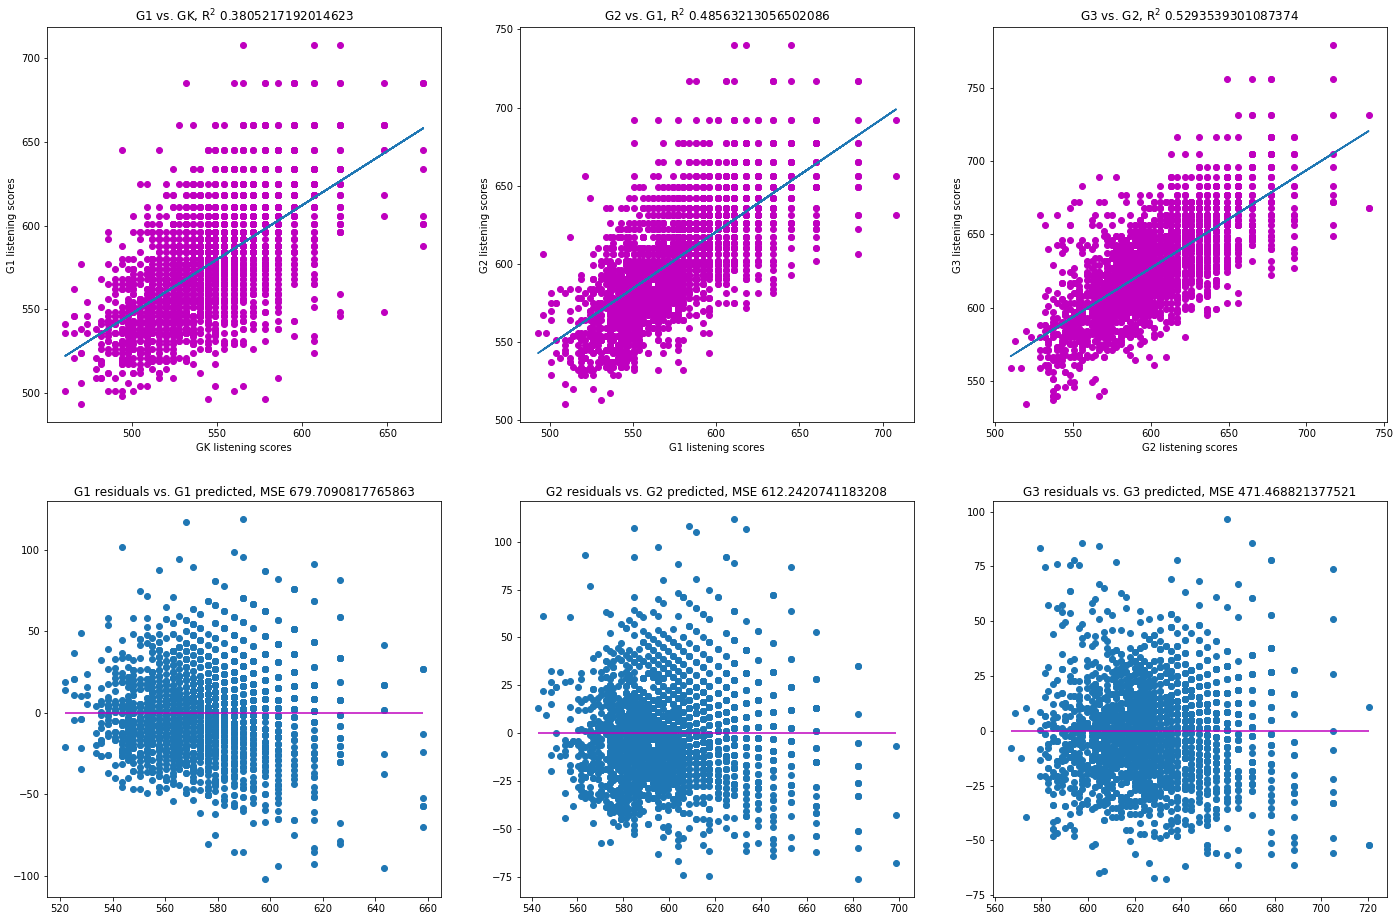

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

axes[0, 0].scatter(lstn.gktlstnss, lstn.g1tlstnss, color='m')
axes[0, 0].plot(lstn.gktlstnss.values, reglk1.predict(lstn.gktlstnss.values.reshape(-1, 1)))
axes[0, 0].set_xlabel('GK listening scores')
axes[0, 0].set_ylabel('G1 listening scores')
axes[0, 0].set_title('G1 vs. GK, R$^2$ {}'.format(reglk1.score(lstn.gktlstnss.values.reshape(-1, 1), lstn.g1tlstnss)))

axes[0, 1].scatter(lstn.g1tlstnss, lstn.g2tlstnss, color='m')
axes[0, 1].plot(lstn.g1tlstnss.values, regl12.predict(lstn.g1tlstnss.values.reshape(-1, 1)))
axes[0, 1].set_xlabel('G1 listening scores')
axes[0, 1].set_ylabel('G2 listening scores')
axes[0, 1].set_title('G2 vs. G1, R$^2$ {}'.format(regl12.score(lstn.g1tlstnss.values.reshape(-1, 1), lstn.g2tlstnss)))

axes[0, 2].scatter(lstn.g2tlstnss, lstn.g3tlstnss, color='m')
axes[0, 2].plot(lstn.g2tlstnss.values, regl23.predict(lstn.g2tlstnss.values.reshape(-1, 1)))
axes[0, 2].set_xlabel('G2 listening scores')
axes[0, 2].set_ylabel('G3 listening scores')
axes[0, 2].set_title('G3 vs. G2, R$^2$ {}'.format(regl23.score(lstn.g2tlstnss.values.reshape(-1, 1), lstn.g3tlstnss)))

axes[1, 0].scatter(reglk1.predict(lstn.gktlstnss.values.reshape(-1, 1)), (lstn.g1tlstnss - reglk1.predict(lstn.gktlstnss.values.reshape(-1, 1))))
axes[1, 0].hlines(y = 0, xmin=reglk1.predict(lstn.gktlstnss.values.reshape(-1, 1)).min(), xmax=reglk1.predict(lstn.gktlstnss.values.reshape(-1, 1)).max(), color='m')
mse = metrics.mean_squared_error(lstn.g1tlstnss, reglk1.predict(lstn.gktlstnss.values.reshape(-1, 1)))
axes[1, 0].set_title('G1 residuals vs. G1 predicted, MSE {}'.format(mse))

axes[1, 1].scatter(regl12.predict(lstn.g1tlstnss.values.reshape(-1, 1)), (lstn.g2tlstnss - regl12.predict(lstn.g1tlstnss.values.reshape(-1, 1))))
axes[1, 1].hlines(y = 0, xmin=regl12.predict(lstn.g1tlstnss.values.reshape(-1, 1)).min(), xmax=regl12.predict(lstn.g1tlstnss.values.reshape(-1, 1)).max(), color='m')
mse = metrics.mean_squared_error(lstn.g2tlstnss, regl12.predict(lstn.g1tlstnss.values.reshape(-1, 1)))
axes[1, 1].set_title('G2 residuals vs. G2 predicted, MSE {}'.format(mse))

axes[1, 2].scatter(regl23.predict(lstn.g2tlstnss.values.reshape(-1, 1)), (lstn.g3tlstnss - regl23.predict(lstn.g2tlstnss.values.reshape(-1, 1))))
axes[1, 2].hlines(y = 0, xmin=regl23.predict(lstn.g2tlstnss.values.reshape(-1, 1)).min(), xmax=regl23.predict(lstn.g2tlstnss.values.reshape(-1, 1)).max(), color='m')
mse = metrics.mean_squared_error(lstn.g3tlstnss, regl23.predict(lstn.g2tlstnss.values.reshape(-1, 1)))
axes[1, 2].set_title('G3 residuals vs. G3 predicted, MSE {}'.format(mse))

plt.show()

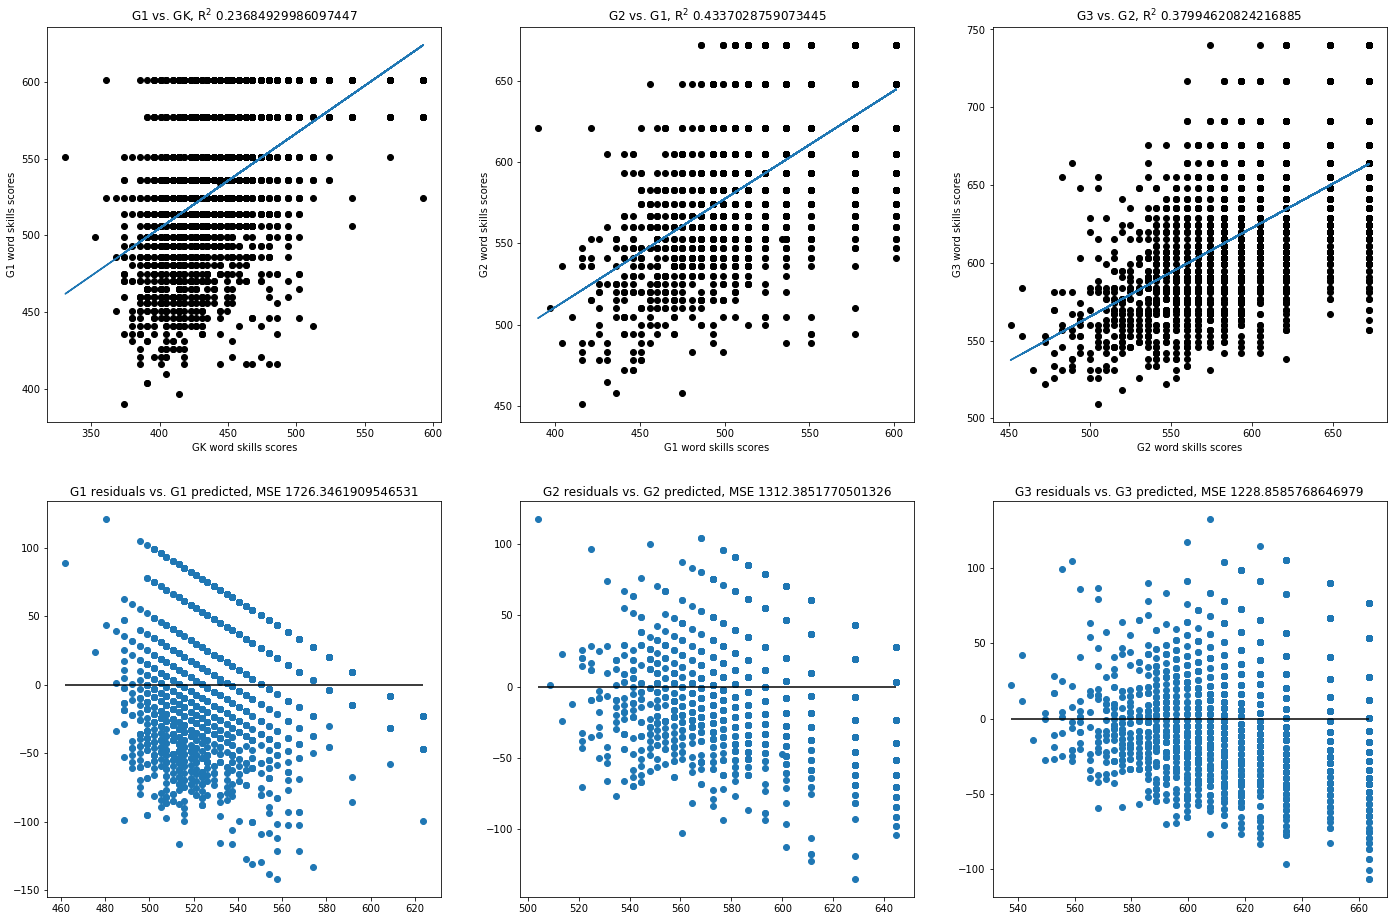

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

axes[0, 0].scatter(word.gktwordss, word.g1twordss, color='black')
axes[0, 0].plot(word.gktwordss.values, regwk1.predict(word.gktwordss.values.reshape(-1, 1)))
axes[0, 0].set_xlabel('GK word skills scores')
axes[0, 0].set_ylabel('G1 word skills scores')
axes[0, 0].set_title('G1 vs. GK, R$^2$ {}'.format(regwk1.score(word.gktwordss.values.reshape(-1, 1), word.g1twordss)))

axes[0, 1].scatter(word.g1twordss, word.g2twordss, color='black')
axes[0, 1].plot(word.g1twordss.values, regw12.predict(word.g1twordss.values.reshape(-1, 1)))
axes[0, 1].set_xlabel('G1 word skills scores')
axes[0, 1].set_ylabel('G2 word skills scores')
axes[0, 1].set_title('G2 vs. G1, R$^2$ {}'.format(regw12.score(word.g1twordss.values.reshape(-1, 1), word.g2twordss)))

axes[0, 2].scatter(word.g2twordss, word.g3twordss, color='black')
axes[0, 2].plot(word.g2twordss.values, regw23.predict(word.g2twordss.values.reshape(-1, 1)))
axes[0, 2].set_xlabel('G2 word skills scores')
axes[0, 2].set_ylabel('G3 word skills scores')
axes[0, 2].set_title('G3 vs. G2, R$^2$ {}'.format(regw23.score(word.g2twordss.values.reshape(-1, 1), word.g3twordss)))

axes[1, 0].scatter(regwk1.predict(word.gktwordss.values.reshape(-1, 1)), (word.g1twordss - regwk1.predict(word.gktwordss.values.reshape(-1, 1))))
axes[1, 0].hlines(y = 0, xmin=regwk1.predict(word.gktwordss.values.reshape(-1, 1)).min(), xmax=regwk1.predict(word.gktwordss.values.reshape(-1, 1)).max(), color='black')
mse = metrics.mean_squared_error(word.g1twordss, regwk1.predict(word.gktwordss.values.reshape(-1, 1)))
axes[1, 0].set_title('G1 residuals vs. G1 predicted, MSE {}'.format(mse))

axes[1, 1].scatter(regw12.predict(word.g1twordss.values.reshape(-1, 1)), (word.g2twordss - regw12.predict(word.g1twordss.values.reshape(-1, 1))))
axes[1, 1].hlines(y = 0, xmin=regw12.predict(word.g1twordss.values.reshape(-1, 1)).min(), xmax=regw12.predict(word.g1twordss.values.reshape(-1, 1)).max(), color='black')
mse = metrics.mean_squared_error(word.g2twordss, regw12.predict(word.g1twordss.values.reshape(-1, 1)))
axes[1, 1].set_title('G2 residuals vs. G2 predicted, MSE {}'.format(mse))

axes[1, 2].scatter(regw23.predict(word.g2twordss.values.reshape(-1, 1)), (word.g3twordss - regw23.predict(word.g2twordss.values.reshape(-1, 1))))
axes[1, 2].hlines(y = 0, xmin=regw23.predict(word.g2twordss.values.reshape(-1, 1)).min(), xmax=regw23.predict(word.g2twordss.values.reshape(-1, 1)).max(), color='black')
mse = metrics.mean_squared_error(word.g3twordss, regw23.predict(word.g2twordss.values.reshape(-1, 1)))
axes[1, 2].set_title('G3 residuals vs. G3 predicted, MSE {}'.format(mse))

plt.show()

All four subjects have an unusual distribution of scores near the top of the range, where values appear to be capped or rounded. This may be due to how the tests were scored.

A notable trend is that test scores in later grades have higher predictive value. With one exception (word skills scores, the unusual distribution of which was noted in our exploratory analysis), the coefficient of determination increases each year. The MSE decreases each year without exception.

This is sensible for several reasons. First, as we saw previously, there is a wide range of ages among these students: some were not even four years old when starting kindergarten, while others were almost seven. Significant cognitive development occurs at these early ages, and the difference between a four-year-old and a five-year-old is larger than the difference between a seven-year-old and an eight-year-old.

Second, it's plausible that younger children are more sensitive to external factors such as class size and teacher effectiveness.

Finally, since the test is standardized, a student's score is calculated relative to other test takers. Because standardized testing is generally mandatory, most of the students in a cohort will be tested each year, and students tend to remain in the same general position relative to the rest of their cohort.

Here black kindergarten students perform about 7 points better with black teachers, while white kindergarten students perform about 7 points better with white teachers. 

# Ordinary least squares (OLS) linear regression

We now do regression on the full data set. We attempt to predict performance on the third grade test from past data, so our four response variables are the four test scores (reading, math, listening, word skills) in grade three. We print out the regression results from the StatsModels package, which includes R$^2$, adjusted R$^2$, and various other measures.

For each of the four subjects, four graphs are produced.

1. Scatterplot of the predicted scores against the actual scores, with the fitted regression line
2. Scatterplot of residuals against the fitted scores, with a horizontal zero line
3. Histogram of standardized residuals (residual values divided by the standard deviation of the residuals; sum of residuals is 0 because we are incorporating a constant term)
4. QQ plot of the standardized residuals against a normal distribution

In [9]:
dataK3pred_sm = sm.add_constant(dataK3pred.copy())

In [10]:
regr3 = sm.OLS((dataK3resp['g3treadss']), dataK3pred_sm).fit()
print(regr3.summary())

                            OLS Regression Results                            
Dep. Variable:              g3treadss   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     65.59
Date:                Mon, 20 Mar 2017   Prob (F-statistic):               0.00
Time:                        18:18:41   Log-Likelihood:                -8817.8
No. Observations:                1955   AIC:                         1.774e+04
Df Residuals:                    1902   BIC:                         1.804e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           197.5333     29.392      6.721

Mean squared error: 484.378287477


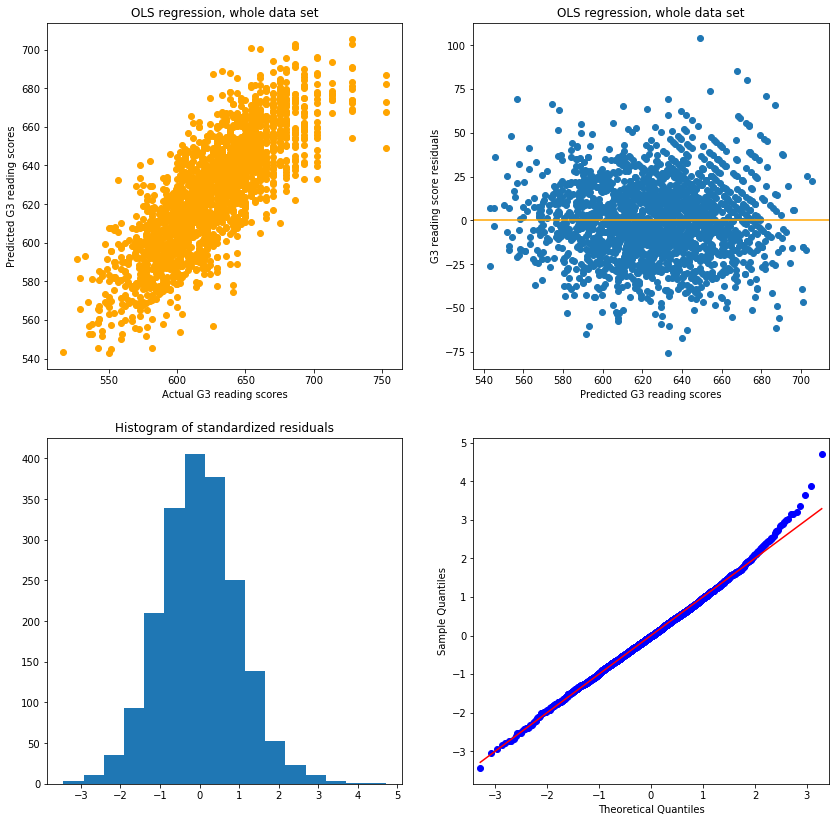

In [11]:
print('Mean squared error:', metrics.mean_squared_error(dataK3resp['g3treadss'], regr3.fittedvalues))

fig, axes = plt.subplots(2, 2, figsize=(14, 14))

axes[0, 0].scatter(dataK3resp.g3treadss, regr3.predict(dataK3pred_sm), color='orange')
axes[0, 0].set_xlabel('Actual G3 reading scores')
axes[0, 0].set_ylabel('Predicted G3 reading scores')
axes[0, 0].set_title('OLS regression, whole data set')

axes[0, 1].scatter(regr3.predict(dataK3pred_sm), (dataK3resp.g3treadss - regr3.predict(dataK3pred_sm)))
axes[0, 1].axhline(y = 0, xmin=0, xmax=1, color='orange')
axes[0, 1].set_xlabel('Predicted G3 reading scores')
axes[0, 1].set_ylabel('G3 reading score residuals')
axes[0, 1].set_title('OLS regression, whole data set')

residstd_regr = stats.zscore(regr3.resid)

axes[1, 0].hist(residstd_regr, bins=bin_counts(residstd_regr))
axes[1, 0].set_title('Histogram of standardized residuals')

graphics.gofplots.qqplot(residstd_regr, line='r', ax=axes[1, 1])
plt.show()

In [12]:
regm3 = sm.OLS((dataK3resp['g3tmathss']), dataK3pred_sm).fit()
print(regm3.summary())

                            OLS Regression Results                            
Dep. Variable:              g3tmathss   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     58.72
Date:                Mon, 20 Mar 2017   Prob (F-statistic):               0.00
Time:                        18:18:43   Log-Likelihood:                -9042.4
No. Observations:                1955   AIC:                         1.819e+04
Df Residuals:                    1902   BIC:                         1.849e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           159.0260     32.971      4.823

Mean squared error: 609.525878412


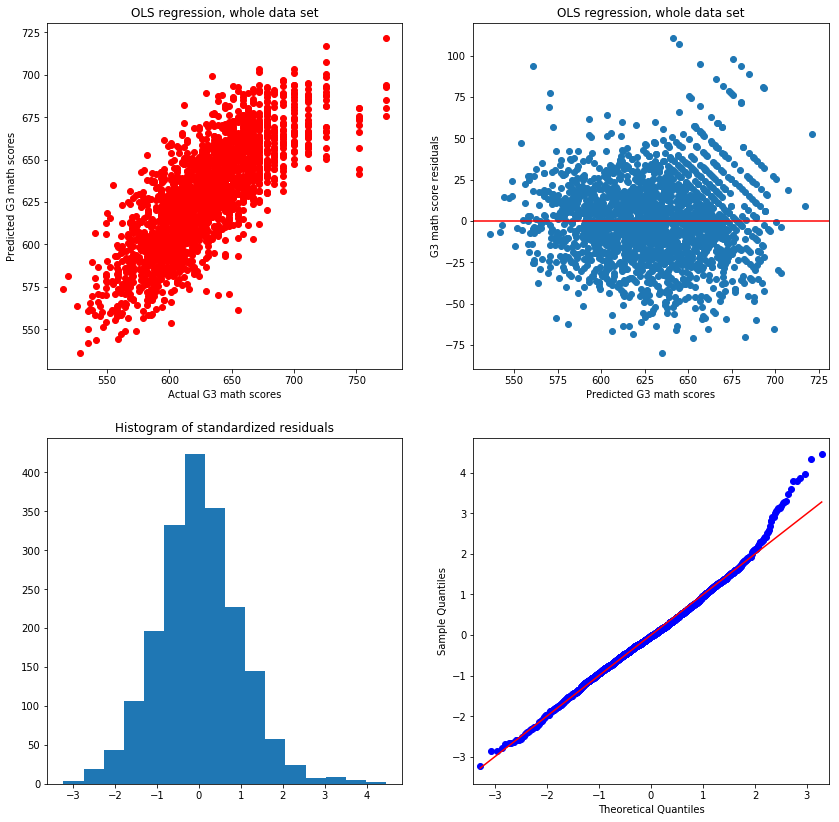

In [13]:
print('Mean squared error:', metrics.mean_squared_error(dataK3resp['g3tmathss'], regm3.fittedvalues))

fig, axes = plt.subplots(2, 2, figsize=(14, 14))

axes[0, 0].scatter(dataK3resp.g3tmathss, regm3.predict(dataK3pred_sm), color='r')
axes[0, 0].set_xlabel('Actual G3 math scores')
axes[0, 0].set_ylabel('Predicted G3 math scores')
axes[0, 0].set_title('OLS regression, whole data set')

axes[0, 1].scatter(regm3.predict(dataK3pred_sm), (dataK3resp.g3tmathss - regm3.predict(dataK3pred_sm)))
axes[0, 1].axhline(y = 0, xmin=0, xmax=1, color='r')
axes[0, 1].set_xlabel('Predicted G3 math scores')
axes[0, 1].set_ylabel('G3 math score residuals')
axes[0, 1].set_title('OLS regression, whole data set')

residstd_regm = stats.zscore(regm3.resid)

axes[1, 0].hist(residstd_regm, bins=bin_counts(residstd_regm))
axes[1, 0].set_title('Histogram of standardized residuals')

graphics.gofplots.qqplot(residstd_regm, line='r', ax=axes[1, 1])
plt.show()

In [14]:
regl3 = sm.OLS((dataK3resp['g3tlstnss']), dataK3pred_sm).fit()
print(regl3.summary())

                            OLS Regression Results                            
Dep. Variable:              g3tlstnss   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     62.46
Date:                Mon, 20 Mar 2017   Prob (F-statistic):               0.00
Time:                        18:18:44   Log-Likelihood:                -8521.3
No. Observations:                1955   AIC:                         1.715e+04
Df Residuals:                    1902   BIC:                         1.744e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           191.7341     25.256      7.592

Mean squared error: 357.652559035


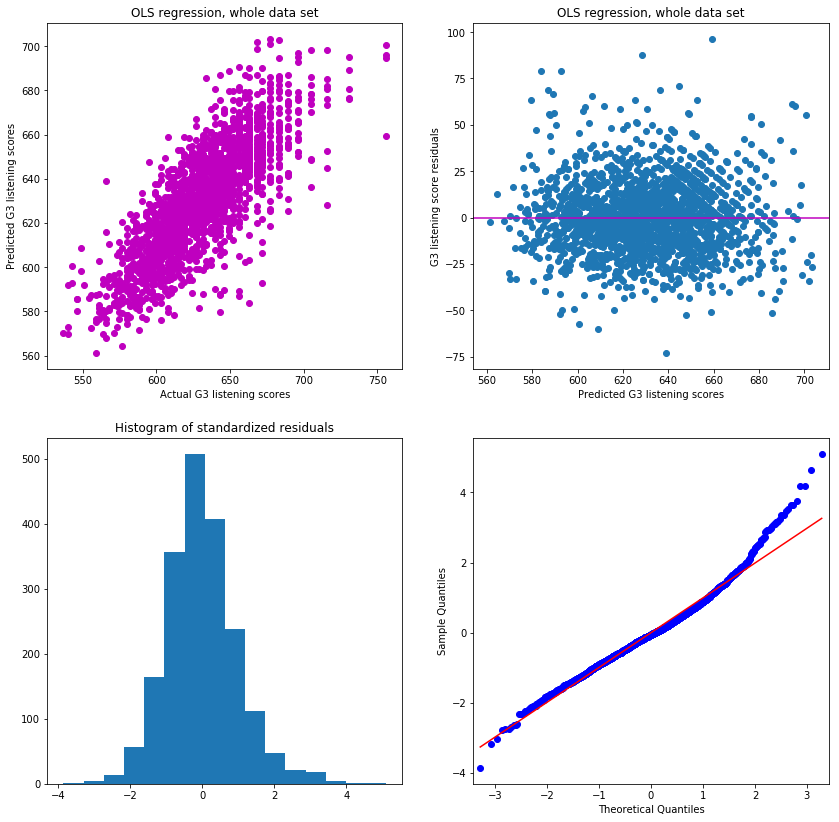

In [15]:
print('Mean squared error:', metrics.mean_squared_error(dataK3resp['g3tlstnss'], regl3.fittedvalues))

fig, axes = plt.subplots(2, 2, figsize=(14, 14))

axes[0, 0].scatter(dataK3resp.g3tlstnss, regl3.predict(dataK3pred_sm), color='m')
axes[0, 0].set_xlabel('Actual G3 listening scores')
axes[0, 0].set_ylabel('Predicted G3 listening scores')
axes[0, 0].set_title('OLS regression, whole data set')

axes[0, 1].scatter(regl3.predict(dataK3pred_sm), (dataK3resp.g3tlstnss - regl3.predict(dataK3pred_sm)))
axes[0, 1].axhline(y = 0, xmin=0, xmax=1, color='m')
axes[0, 1].set_xlabel('Predicted G3 listening scores')
axes[0, 1].set_ylabel('G3 listening score residuals')
axes[0, 1].set_title('OLS regression, whole data set')

residstd_regl = stats.zscore(regl3.resid)

axes[1, 0].hist(residstd_regl, bins=bin_counts(residstd_regl))
axes[1, 0].set_title('Histogram of standardized residuals')

graphics.gofplots.qqplot(residstd_regl, line='r', ax=axes[1, 1])
plt.show()

In [16]:
regw3 = sm.OLS((dataK3resp['g3twordss']), dataK3pred_sm).fit()
print(regw3.summary())

                            OLS Regression Results                            
Dep. Variable:              g3twordss   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     41.61
Date:                Mon, 20 Mar 2017   Prob (F-statistic):          6.48e-272
Time:                        18:18:45   Log-Likelihood:                -9408.7
No. Observations:                1955   AIC:                         1.892e+04
Df Residuals:                    1902   BIC:                         1.922e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           187.4531     39.766      4.714

Mean squared error: 886.628225268


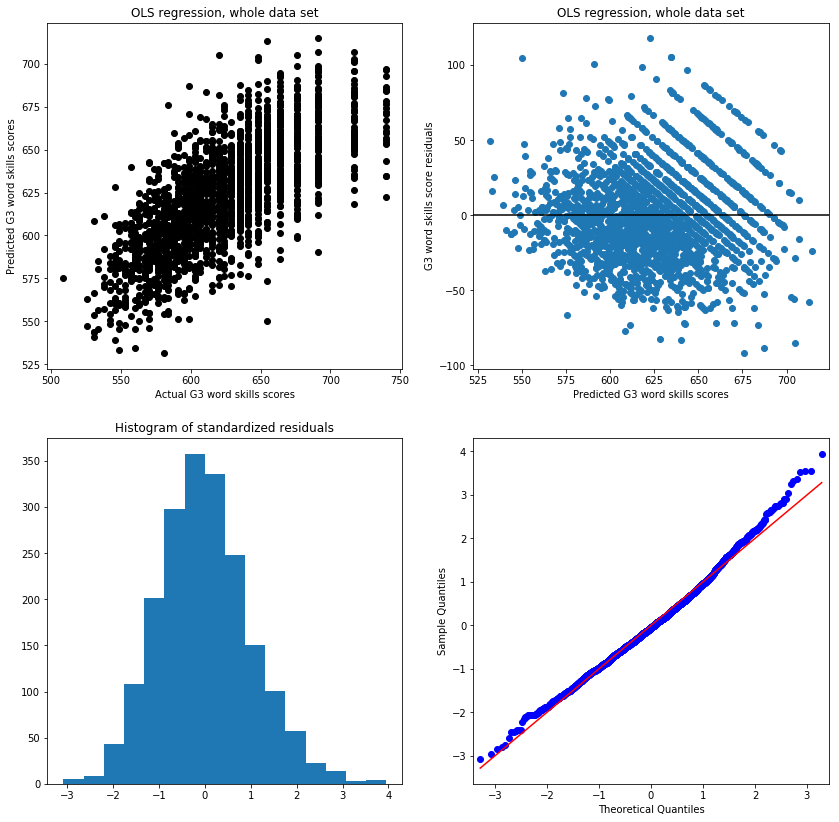

In [17]:
print('Mean squared error:', metrics.mean_squared_error(dataK3resp['g3twordss'], regw3.fittedvalues))

fig, axes = plt.subplots(2, 2, figsize=(14, 14))

axes[0, 0].scatter(dataK3resp.g3twordss, regw3.predict(dataK3pred_sm), color='black')
axes[0, 0].set_xlabel('Actual G3 word skills scores')
axes[0, 0].set_ylabel('Predicted G3 word skills scores')
axes[0, 0].set_title('OLS regression, whole data set')

axes[0, 1].scatter(regw3.predict(dataK3pred_sm), (dataK3resp.g3twordss - regw3.predict(dataK3pred_sm)))
axes[0, 1].axhline(y = 0, xmin=0, xmax=1, color='black')
axes[0, 1].set_xlabel('Predicted G3 word skills scores')
axes[0, 1].set_ylabel('G3 word skills score residuals')
axes[0, 1].set_title('OLS regression, whole data set')

residstd_regw = stats.zscore(regw3.resid)

axes[1, 0].hist(residstd_regw, bins=bin_counts(residstd_regw))
axes[1, 0].set_title('Histogram of standardized residuals')

graphics.gofplots.qqplot(residstd_regw, line='r', ax=axes[1, 1])
plt.show()

As the StatsModels reports indicate, there are multicollinearity problems in our regression. This is because many of the explanatory variables are strongly correlated with each other, which can be seen in the correlation chart. Furthermore, because all covariates are incorporated, even though many have high p-values, these models are unintuitive and difficult to interpret. We seek an alternative linear method that will prune the features and produce more parsimonious and understandable models. For this purpose, we employ elastic net regression.

# Elastic net regression

Elastic net can linearly combine the L1 penalty of LASSO with the L2 penalty of ridge regression, which allows it to perform covariate selection while retaining the regularization properties of ridge regression. Regularization reduces overfitting by penalizing models for having large coefficients. Elastic net addresses the problem of multicollinearity by reducing many of the predictor variable coefficients to zero via its penalty function. This grants lower model variance and greater interpretability because only a subset of the explanatory variables will be used in the model.

Since regularization constrains the coefficients for each explanatory variable, it is greatly affected by the scale of the variables. To improve performance, we standardize all predictors.

In [18]:
scaler_K3 = pp.StandardScaler().fit(dataK3pred)

Alpha: 0.487254287347
L1 ratio: 0.98643860338
Model: 
626.232736573 + 1.1510410102442301 * female - 1.1010383284836538 * age + 0.1949875598311288 * yearssmall - 0.0033410526404309237 * gkthighdegree + 0.2513919338380526 * gktreadss + 1.020759635066896 * gktmathss + 1.5512876371991573 * gktlstnss + 0.49233459136380303 * gktwordss - 0.21379756325764968 * 1twhite + 0.14355170332694497 * g1thighdegree + 6.477560240699188 * g1treadss + 0.25855276441716724 * g1tmathss + 0.5701832740996565 * g1tlstnss + 0.752077358460286 * g1readbsraw - 0.25048347627577044 * 2twhite - 0.6098770522883763 * g2thighdegree - 1.0115441479968388 * g2tyears - 0.4657442966296355 * g2freelunch + 12.440211432984121 * g2treadss + 2.1900496086200465 * g2tmathss + 2.8591454870954953 * g2tlstnss + 0.9220428304319654 * g2twordss + 4.9532434295331935 * g2readbsraw + 0.8761069397492287 * 3innercity + 0.08918396929076322 * g3thighdegree + 0.9981416398726767 * g3tyears - 0.05414643479547323 * g3absent
Mean squared error: 492.80

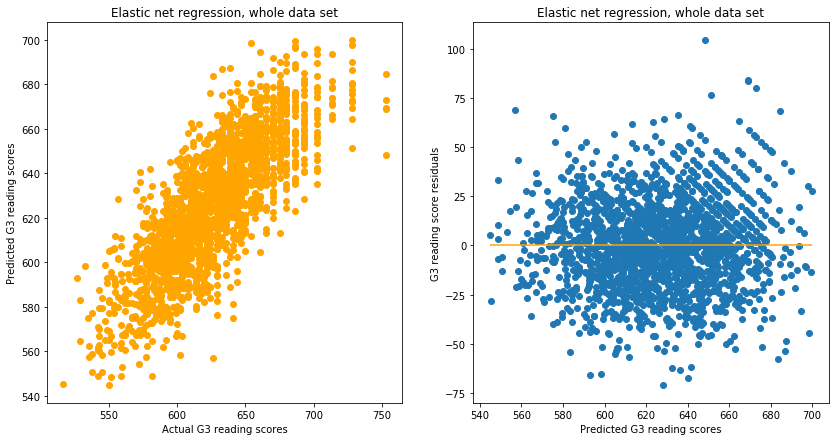

In [19]:
enr3 = lm.ElasticNetCV(l1_ratio=(np.linspace(0.01, 1, 45) ** 0.6))

enr3.fit(scaler_K3.transform(dataK3pred), dataK3resp['g3treadss'])

print('Alpha:', enr3.alpha_)

print('L1 ratio:', enr3.l1_ratio_)

modelr3 = str(enr3.intercept_)
for i in range(len(enr3.coef_)):
    if enr3.coef_[i] > 0:
        modelr3 = modelr3 + ' + {} * {}'.format(enr3.coef_[i], dataK3pred.columns[i])
    if enr3.coef_[i] < 0:
        modelr3 = modelr3 + ' - {} * {}'.format(abs(enr3.coef_[i]), dataK3pred.columns[i])
print('Model: \n'+modelr3)

print('Mean squared error:', metrics.mean_squared_error(enr3.predict(scaler_K3.transform(dataK3pred)), dataK3resp.g3treadss))

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination:', enr3.score(scaler_K3.transform(dataK3pred), dataK3resp.g3treadss))

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(dataK3resp.g3treadss, enr3.predict(scaler_K3.transform(dataK3pred)), color='orange')
axes[0].set_xlabel('Actual G3 reading scores')
axes[0].set_ylabel('Predicted G3 reading scores')
axes[0].set_title('Elastic net regression, whole data set')

axes[1].scatter(enr3.predict(scaler_K3.transform(dataK3pred)), (dataK3resp.g3treadss - enr3.predict(scaler_K3.transform(dataK3pred))))
axes[1].hlines(y = 0, xmin=enr3.predict(scaler_K3.transform(dataK3pred)).min(), xmax=enr3.predict(scaler_K3.transform(dataK3pred)).max(), color='orange')
axes[1].set_xlabel('Predicted G3 reading scores')
axes[1].set_ylabel('G3 reading score residuals')
axes[1].set_title('Elastic net regression, whole data set')

plt.show()

Alpha: 0.736741428613
L1 ratio: 0.98643860338
Model: 
625.645975443 + 0.4206834101233402 * female - 0.6121877170371561 * age + 0.002066611294711101 * yearssmall - 0.14586693494358233 * gktyears + 0.683012259867563 * gktreadss + 0.679367265730178 * gktmathss + 1.9657961285680512 * gktlstnss + 0.48574930897705115 * gktwordss - 0.2777040594714537 * 1twhite + 0.13498700597614083 * g1thighdegree + 7.028487744164701 * g1treadss + 0.4092076254349798 * g1readbsraw - 0.2778450240690823 * 2twhite - 0.383973513062527 * g2thighdegree - 0.3757070949216711 * g2tyears + 12.731600629749613 * g2treadss + 2.190695609199886 * g2tmathss + 2.8363499952207873 * g2tlstnss + 5.795627696337131 * g2readbsraw + 0.5272447579959397 * 3innercity + 1.3276264873935983 * g3tyears
Mean squared error: 562.115337223
Coefficient of determination: 0.583020713549


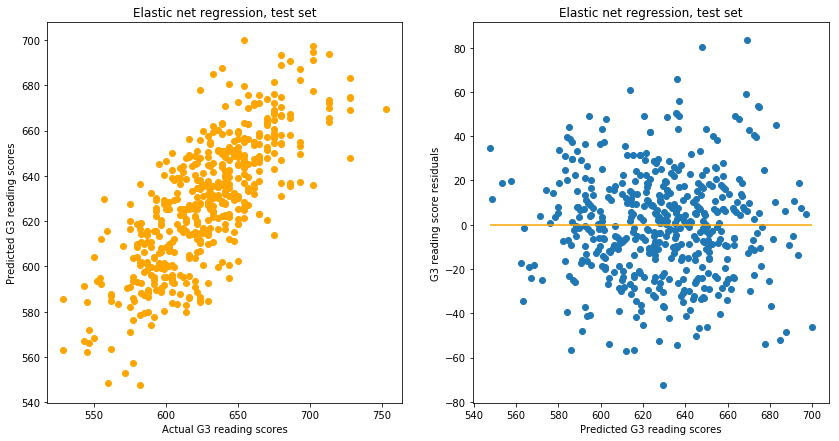

In [20]:
X_train_enr, X_test_enr, y_train_enr, y_test_enr = ms.train_test_split(dataK3pred, dataK3resp['g3treadss'], test_size=0.25, random_state=0)

enr3tt = lm.ElasticNetCV(l1_ratio=(np.linspace(0.01, 1, 45) ** 0.6))

scaler_enrtt = pp.StandardScaler().fit(X_train_enr)

enr3tt.fit(scaler_enrtt.transform(X_train_enr), y_train_enr)

print('Alpha:', enr3tt.alpha_)

print('L1 ratio:', enr3.l1_ratio_)

modelr3tt = str(enr3tt.intercept_)
for i in range(len(enr3tt.coef_)):
    if enr3tt.coef_[i] > 0:
        modelr3tt = modelr3tt + ' + {} * {}'.format(enr3tt.coef_[i], dataK3pred.columns[i])
    if enr3tt.coef_[i] < 0:
        modelr3tt = modelr3tt + ' - {} * {}'.format(abs(enr3tt.coef_[i]), dataK3pred.columns[i])
print('Model: \n'+modelr3tt)

print('Mean squared error:', metrics.mean_squared_error(enr3tt.predict(scaler_enrtt.transform(X_test_enr)), y_test_enr))

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination:', enr3tt.score(scaler_enrtt.transform(X_test_enr), y_test_enr))

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(y_test_enr, enr3tt.predict(scaler_enrtt.transform(X_test_enr)), color='orange')
axes[0].set_xlabel('Actual G3 reading scores')
axes[0].set_ylabel('Predicted G3 reading scores')
axes[0].set_title('Elastic net regression, test set')

axes[1].scatter(enr3tt.predict(scaler_enrtt.transform(X_test_enr)), (y_test_enr - enr3tt.predict(scaler_enrtt.transform(X_test_enr))))
axes[1].hlines(y = 0, xmin=enr3tt.predict(scaler_enrtt.transform(X_test_enr)).min(), xmax=enr3tt.predict(scaler_enrtt.transform(X_test_enr)).max(), color='orange')
axes[1].set_xlabel('Predicted G3 reading scores')
axes[1].set_ylabel('G3 reading score residuals')
axes[1].set_title('Elastic net regression, test set')

plt.show()

Alpha: 0.319962251812
L1 ratio: 0.944984827018
Model: 
628.443478261 - 1.054324239480973 * age - 0.0004256804492682017 * yearssmall + 0.4760146860951427 * kinnercity - 0.9930917846964575 * ksuburban - 0.8960280813546972 * ktwhite - 0.15455452667930283 * gktyears + 2.7900275470268 * gktmathss + 0.8228167093872863 * gktwordss - 0.5830358801617601 * 1twhite + 1.1424157635330459 * g1thighdegree + 1.850649962517347 * g1tyears - 2.3218282898276983 * g1freelunch + 0.1392467639923486 * g1absent + 0.1244697987913828 * g1treadss + 6.841099231702899 * g1tmathss + 0.05068712238902729 * g1tlstnss + 0.03266963694461904 * g1twordss - 0.4756975309742691 * g1readbsraw + 2.755947845831074 * g1mathbsraw - 0.552941951510959 * g2thighdegree - 0.754812553869969 * g2tyears + 5.370254698794995 * g2treadss + 11.547964997694171 * g2tmathss + 2.165225238758403 * g2tlstnss + 0.17827680722149333 * g2twordss + 2.706361001738603 * g2readbsraw + 1.9007813271863914 * g2mathbsraw + 0.14209546754728314 * 3innercity - 0.

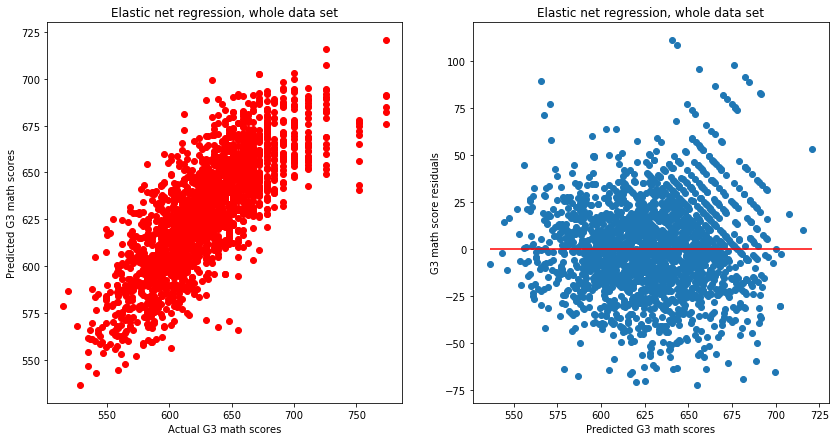

In [21]:
enm3 = lm.ElasticNetCV(l1_ratio=(np.linspace(0.01, 1, 45) ** 0.6))

enm3.fit(scaler_K3.transform(dataK3pred), dataK3resp['g3tmathss'])

print('Alpha:', enm3.alpha_)

print('L1 ratio:', enm3.l1_ratio_)

modelr3 = str(enm3.intercept_)
for i in range(len(enm3.coef_)):
    if enm3.coef_[i] > 0:
        modelr3 = modelr3 + ' + {} * {}'.format(enm3.coef_[i], dataK3pred.columns[i])
    if enm3.coef_[i] < 0:
        modelr3 = modelr3 + ' - {} * {}'.format(abs(enm3.coef_[i]), dataK3pred.columns[i])
print('Model: \n'+modelr3)

print('Mean squared error:', metrics.mean_squared_error(enm3.predict(scaler_K3.transform(dataK3pred)), dataK3resp.g3tmathss))

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination:', enm3.score(scaler_K3.transform(dataK3pred), dataK3resp.g3tmathss))

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(dataK3resp.g3tmathss, enm3.predict(scaler_K3.transform(dataK3pred)), color='r')
axes[0].set_xlabel('Actual G3 math scores')
axes[0].set_ylabel('Predicted G3 math scores')
axes[0].set_title('Elastic net regression, whole data set')

axes[1].scatter(enm3.predict(scaler_K3.transform(dataK3pred)), (dataK3resp.g3tmathss - enm3.predict(scaler_K3.transform(dataK3pred))))
axes[1].hlines(y = 0, xmin=enm3.predict(scaler_K3.transform(dataK3pred)).min(), xmax=enm3.predict(scaler_K3.transform(dataK3pred)).max(), color='r')
axes[1].set_xlabel('Predicted G3 math scores')
axes[1].set_ylabel('G3 math score residuals')
axes[1].set_title('Elastic net regression, whole data set')

plt.show()

Alpha: 0.399667054717
L1 ratio: 0.944984827018
Model: 
627.694406548 - 0.3371865638484516 * asian - 0.5519035172659417 * age + 1.0636932596986355 * kinnercity - 0.5289990283170654 * ksuburban - 0.30116184439201454 * ktwhite - 0.08591261560547168 * gktyears + 1.8377226670691618 * gktmathss + 1.5555243363625024 * gktwordss - 1.3145948267719054 * 1twhite + 1.2133698267693742 * g1thighdegree + 1.4966797703096677 * g1tyears - 2.064218515371674 * g1freelunch + 0.3782221491034532 * g1absent + 1.1608324312041138 * g1treadss + 6.622696303200704 * g1tmathss + 0.17595332185946058 * g1twordss - 0.9887436828907058 * g1readbsraw + 2.966995525403117 * g1mathbsraw - 0.017140822167964784 * g2thighdegree - 0.4494851753678753 * g2tyears + 5.010305071940575 * g2treadss + 10.865421278893548 * g2tmathss + 2.2872378228871155 * g2tlstnss + 3.377642061033918 * g2readbsraw + 2.443488992154621 * g2mathbsraw + 0.11641990241273366 * 3twhite - 0.9229513373639574 * 3tblack + 1.096912075204731 * g3thighdegree - 1.835

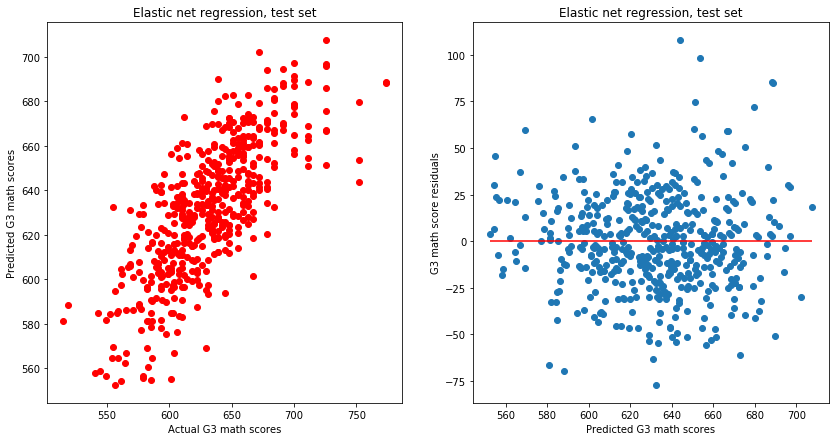

In [22]:
X_train_enm, X_test_enm, y_train_enm, y_test_enm = ms.train_test_split(dataK3pred, dataK3resp['g3tmathss'], test_size=0.25, random_state=0)

enm3tt = lm.ElasticNetCV(l1_ratio=(np.linspace(0.01, 1, 45) ** 0.6))

scaler_enmtt = pp.StandardScaler().fit(X_train_enm)

enm3tt.fit(scaler_enmtt.transform(X_train_enm), y_train_enm)

print('Alpha:', enm3tt.alpha_)

print('L1 ratio:', enm3.l1_ratio_)

modelr3tt = str(enm3tt.intercept_)
for i in range(len(enm3tt.coef_)):
    if enm3tt.coef_[i] > 0:
        modelr3tt = modelr3tt + ' + {} * {}'.format(enm3tt.coef_[i], dataK3pred.columns[i])
    if enm3tt.coef_[i] < 0:
        modelr3tt = modelr3tt + ' - {} * {}'.format(abs(enm3tt.coef_[i]), dataK3pred.columns[i])
print('Model: \n'+modelr3tt)

print('Mean squared error:', metrics.mean_squared_error(enm3tt.predict(scaler_enmtt.transform(X_test_enm)), y_test_enm))

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination:', enm3tt.score(scaler_enmtt.transform(X_test_enm), y_test_enm))

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(y_test_enm, enm3tt.predict(scaler_enmtt.transform(X_test_enm)), color='r')
axes[0].set_xlabel('Actual G3 math scores')
axes[0].set_ylabel('Predicted G3 math scores')
axes[0].set_title('Elastic net regression, test set')

axes[1].scatter(enm3tt.predict(scaler_enmtt.transform(X_test_enm)), (y_test_enm - enm3tt.predict(scaler_enmtt.transform(X_test_enm))))
axes[1].hlines(y = 0, xmin=enm3tt.predict(scaler_enmtt.transform(X_test_enm)).min(), xmax=enm3tt.predict(scaler_enmtt.transform(X_test_enm)).max(), color='r')
axes[1].set_xlabel('Predicted G3 math scores')
axes[1].set_ylabel('G3 math score residuals')
axes[1].set_title('Elastic net regression, test set')

plt.show()

Alpha: 0.23382133549
L1 ratio: 0.843148171589
Model: 
629.660869565 - 0.9512873186934578 * female - 0.23139548910998653 * black - 1.086452946737745 * age - 0.24286473770731826 * yearssmall - 1.596836531144923 * ktwhite + 0.8972103214900118 * gkthighdegree - 0.1195834505972898 * gktyears - 0.1616099811749588 * gkfreelunch + 0.33335987047556787 * gkabsent - 0.025802838802280285 * gktreadss + 3.4458110680688705 * gktlstnss + 0.8780115527463528 * 1twhite + 0.3365853815321262 * g1tyears - 0.5738496415031962 * g1freelunch + 0.1755216096843741 * g1absent + 0.4581656059750676 * g1treadss + 7.689990144130709 * g1tlstnss - 0.35144962418843 * g1readbsraw + 0.4180305521112086 * g1mathbsraw + 0.2256308436676806 * 2twhite - 0.5463446159333215 * g2thighdegree - 0.4137086193698135 * g2tyears - 0.6551550207575529 * g2freelunch + 1.223004150859539 * g2treadss + 0.8990958182138821 * g2tmathss + 11.013192488123995 * g2tlstnss + 1.239631364976495 * g2twordss + 2.5167553226484416 * g2readbsraw - 0.363656471

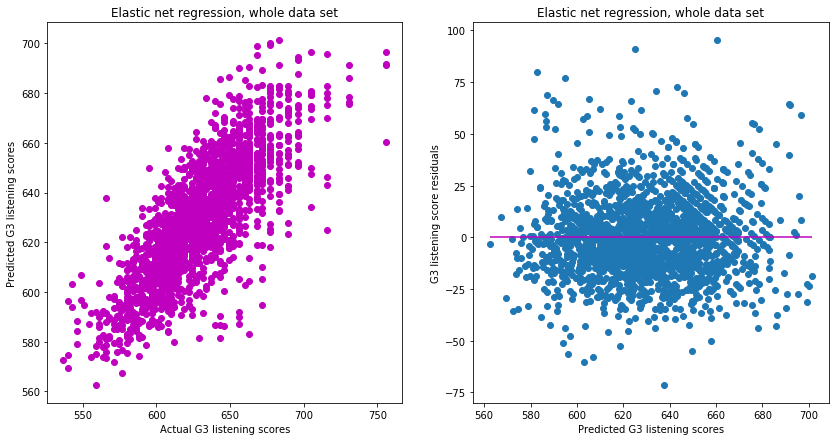

In [23]:
enl3 = lm.ElasticNetCV(l1_ratio=(np.linspace(0.01, 1, 45) ** 0.6))

enl3.fit(scaler_K3.transform(dataK3pred), dataK3resp['g3tlstnss'])

print('Alpha:', enl3.alpha_)

print('L1 ratio:', enl3.l1_ratio_)

modelr3 = str(enl3.intercept_)
for i in range(len(enl3.coef_)):
    if enl3.coef_[i] > 0:
        modelr3 = modelr3 + ' + {} * {}'.format(enl3.coef_[i], dataK3pred.columns[i])
    if enl3.coef_[i] < 0:
        modelr3 = modelr3 + ' - {} * {}'.format(abs(enl3.coef_[i]), dataK3pred.columns[i])
print('Model: \n'+modelr3)

print('Mean squared error:', metrics.mean_squared_error(enl3.predict(scaler_K3.transform(dataK3pred)), dataK3resp.g3tlstnss))

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination:', enl3.score(scaler_K3.transform(dataK3pred), dataK3resp.g3tlstnss))

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(dataK3resp.g3tlstnss, enl3.predict(scaler_K3.transform(dataK3pred)), color='m')
axes[0].set_xlabel('Actual G3 listening scores')
axes[0].set_ylabel('Predicted G3 listening scores')
axes[0].set_title('Elastic net regression, whole data set')

axes[1].scatter(enl3.predict(scaler_K3.transform(dataK3pred)), (dataK3resp.g3tlstnss - enl3.predict(scaler_K3.transform(dataK3pred))))
axes[1].hlines(y = 0, xmin=enl3.predict(scaler_K3.transform(dataK3pred)).min(), xmax=enl3.predict(scaler_K3.transform(dataK3pred)).max(), color='m')
axes[1].set_xlabel('Predicted G3 listening scores')
axes[1].set_ylabel('G3 listening score residuals')
axes[1].set_title('Elastic net regression, whole data set')

plt.show()

Alpha: 0.266649313087
L1 ratio: 0.843148171589
Model: 
629.438608458 - 0.8198816799999407 * female + 0.4471796388055248 * white - 0.8701835267397479 * age - 0.05999293976578962 * yearssmall + 0.27741234546776944 * kinnercity - 1.2555044887075075 * ktwhite + 1.0991450711946178 * gkthighdegree - 0.027157071162342082 * gkfreelunch + 0.024096421246948743 * gkabsent - 0.6496733543262609 * gktmathss + 3.798746356201512 * gktlstnss + 0.638819238044504 * gktwordss + 0.2822153370718164 * 1twhite - 0.07210461122960886 * g1thighdegree + 0.9127977249332762 * g1tyears - 0.3992610256182034 * g1freelunch + 0.5988155010896724 * g1absent + 0.17646983287497875 * g1treadss + 7.4303172659127235 * g1tlstnss - 1.0999298859512823 * g1readbsraw + 0.34761104226422007 * g1mathbsraw + 0.06461775279035654 * 2twhite - 0.6377510728487679 * g2thighdegree - 0.3227633889370964 * g2tyears - 1.0897530211586601 * g2freelunch + 1.221525359605106 * g2treadss + 1.1838759322893924 * g2tmathss + 10.908887731839743 * g2tlstnss

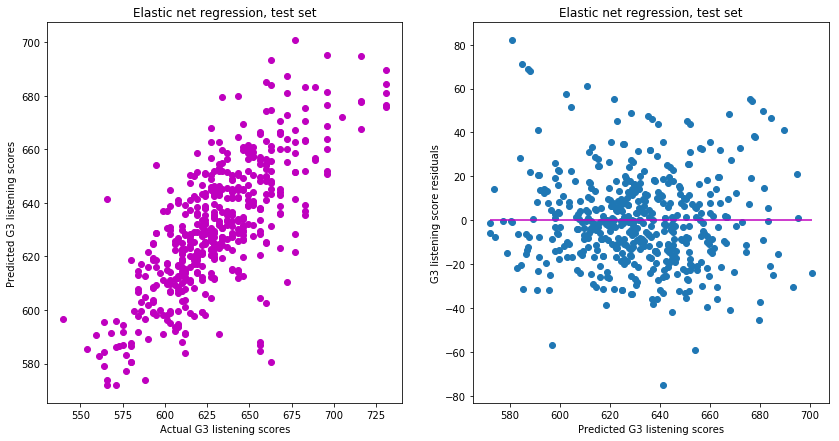

In [24]:
X_train_enl, X_test_enl, y_train_enl, y_test_enl = ms.train_test_split(dataK3pred, dataK3resp['g3tlstnss'], test_size=0.25, random_state=0)

enl3tt = lm.ElasticNetCV(l1_ratio=(np.linspace(0.01, 1, 45) ** 0.6))

scaler_enltt = pp.StandardScaler().fit(X_train_enl)

enl3tt.fit(scaler_enltt.transform(X_train_enl), y_train_enl)

print('Alpha:', enl3tt.alpha_)

print('L1 ratio:', enl3.l1_ratio_)

modelr3tt = str(enl3tt.intercept_)
for i in range(len(enl3tt.coef_)):
    if enl3tt.coef_[i] > 0:
        modelr3tt = modelr3tt + ' + {} * {}'.format(enl3tt.coef_[i], dataK3pred.columns[i])
    if enl3tt.coef_[i] < 0:
        modelr3tt = modelr3tt + ' - {} * {}'.format(abs(enl3tt.coef_[i]), dataK3pred.columns[i])
print('Model: \n'+modelr3tt)

print('Mean squared error:', metrics.mean_squared_error(enl3tt.predict(scaler_enltt.transform(X_test_enl)), y_test_enl))

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination:', enl3tt.score(scaler_enltt.transform(X_test_enl), y_test_enl))

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(y_test_enl, enl3tt.predict(scaler_enltt.transform(X_test_enl)), color='m')
axes[0].set_xlabel('Actual G3 listening scores')
axes[0].set_ylabel('Predicted G3 listening scores')
axes[0].set_title('Elastic net regression, test set')

axes[1].scatter(enl3tt.predict(scaler_enltt.transform(X_test_enl)), (y_test_enl - enl3tt.predict(scaler_enltt.transform(X_test_enl))))
axes[1].hlines(y = 0, xmin=enl3tt.predict(scaler_enltt.transform(X_test_enl)).min(), xmax=enl3tt.predict(scaler_enltt.transform(X_test_enl)).max(), color='m')
axes[1].set_xlabel('Predicted G3 listening scores')
axes[1].set_ylabel('G3 listening score residuals')
axes[1].set_title('Elastic net regression, test set')

plt.show()

Alpha: 0.801031078221
L1 ratio: 1.0
Model: 
623.668542199 + 0.7320495894516512 * female - 0.31473268192361664 * age + 0.2398686318000863 * yearssmall - 0.4190676547485013 * gkthighdegree - 0.08558992209532439 * gktyears + 0.30797841717171526 * gktreadss + 1.084085778739625 * gktwordss + 0.5413069616036419 * g1thighdegree - 0.5371238662963435 * g1absent + 7.336299468016749 * g1treadss + 0.7755105597820963 * g1tmathss - 1.0697840844168196 * g1tlstnss + 0.6699243290065122 * g1mathbsraw - 0.6244536946886412 * g2thighdegree - 1.2749155365325322 * g2tyears + 19.19189328395041 * g2treadss + 2.289008115166911 * g2tmathss + 3.448510216571232 * g2readbsraw + 0.7215919360911036 * g3tyears
Mean squared error: 909.968208164
Coefficient of determination: 0.519871559072


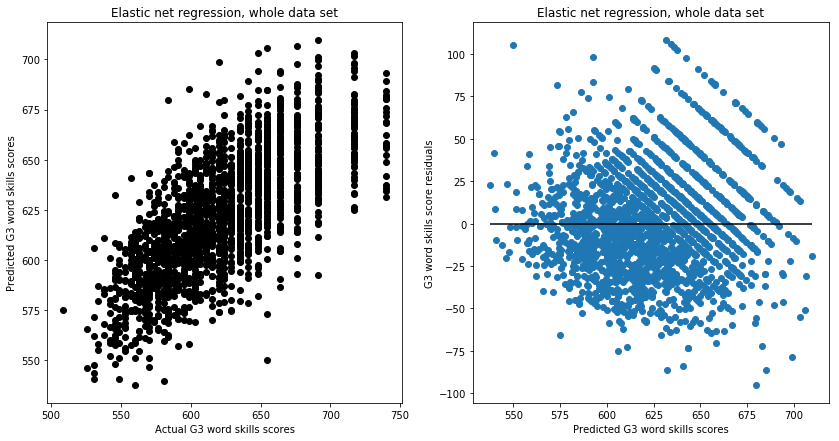

In [25]:
enw3 = lm.ElasticNetCV(l1_ratio=(np.linspace(0.01, 1, 45) ** 0.6))

enw3.fit(scaler_K3.transform(dataK3pred), dataK3resp['g3twordss'])

print('Alpha:', enw3.alpha_)

print('L1 ratio:', enw3.l1_ratio_)

modelr3 = str(enw3.intercept_)
for i in range(len(enw3.coef_)):
    if enw3.coef_[i] > 0:
        modelr3 = modelr3 + ' + {} * {}'.format(enw3.coef_[i], dataK3pred.columns[i])
    if enw3.coef_[i] < 0:
        modelr3 = modelr3 + ' - {} * {}'.format(abs(enw3.coef_[i]), dataK3pred.columns[i])
print('Model: \n'+modelr3)

print('Mean squared error:', metrics.mean_squared_error(enw3.predict(scaler_K3.transform(dataK3pred)), dataK3resp.g3twordss))

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination:', enw3.score(scaler_K3.transform(dataK3pred), dataK3resp.g3twordss))

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(dataK3resp.g3twordss, enw3.predict(scaler_K3.transform(dataK3pred)), color='black')
axes[0].set_xlabel('Actual G3 word skills scores')
axes[0].set_ylabel('Predicted G3 word skills scores')
axes[0].set_title('Elastic net regression, whole data set')

axes[1].scatter(enw3.predict(scaler_K3.transform(dataK3pred)), (dataK3resp.g3twordss - enw3.predict(scaler_K3.transform(dataK3pred))))
axes[1].hlines(y = 0, xmin=enw3.predict(scaler_K3.transform(dataK3pred)).min(), xmax=enw3.predict(scaler_K3.transform(dataK3pred)).max(), color='black')
axes[1].set_xlabel('Predicted G3 word skills scores')
axes[1].set_ylabel('G3 word skills score residuals')
axes[1].set_title('Elastic net regression, whole data set')

plt.show()

Alpha: 0.875437884059
L1 ratio: 1.0
Model: 
622.475443383 + 0.01402371651117285 * yearssmall - 0.11935349425002542 * gkthighdegree - 0.9608848903090181 * gktyears + 0.026792099741528377 * gkfreelunch + 1.2355579907201646 * gktreadss + 0.13099936893916142 * gktwordss - 0.07061393425262051 * 1twhite + 0.6728982841887603 * g1thighdegree - 0.36311392823139166 * g1absent + 7.706022708132043 * g1treadss + 0.18075763364584888 * g1tmathss - 1.234396828247961 * g1tlstnss + 0.8193146929154639 * g1mathbsraw - 0.1696115363581598 * 2twhite - 0.19953219348125434 * g2thighdegree - 0.4035050791462304 * g2tyears + 19.973027626710927 * g2treadss + 2.627325137553671 * g2tmathss + 2.8899542597664727 * g2readbsraw + 0.0028940455828883587 * g2mathbsraw - 0.34347811728353306 * g3thighdegree + 1.0523485727900241 * g3tyears
Mean squared error: 1016.57992179
Coefficient of determination: 0.457396499535


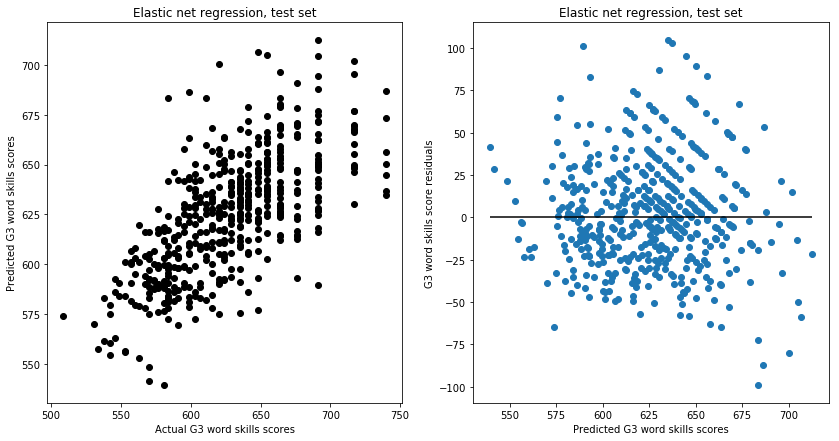

In [26]:
X_train_enw, X_test_enw, y_train_enw, y_test_enw = ms.train_test_split(dataK3pred, dataK3resp['g3twordss'], test_size=0.25, random_state=0)

enw3tt = lm.ElasticNetCV(l1_ratio=(np.linspace(0.01, 1, 45) ** 0.6))

scaler_enwtt = pp.StandardScaler().fit(X_train_enw)

enw3tt.fit(scaler_enwtt.transform(X_train_enw), y_train_enw)

print('Alpha:', enw3tt.alpha_)

print('L1 ratio:', enw3.l1_ratio_)

modelr3tt = str(enw3tt.intercept_)
for i in range(len(enw3tt.coef_)):
    if enw3tt.coef_[i] > 0:
        modelr3tt = modelr3tt + ' + {} * {}'.format(enw3tt.coef_[i], dataK3pred.columns[i])
    if enw3tt.coef_[i] < 0:
        modelr3tt = modelr3tt + ' - {} * {}'.format(abs(enw3tt.coef_[i]), dataK3pred.columns[i])
print('Model: \n'+modelr3tt)

print('Mean squared error:', metrics.mean_squared_error(enw3tt.predict(scaler_enwtt.transform(X_test_enw)), y_test_enw))

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination:', enw3tt.score(scaler_enwtt.transform(X_test_enw), y_test_enw))

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(y_test_enw, enw3tt.predict(scaler_enwtt.transform(X_test_enw)), color='black')
axes[0].set_xlabel('Actual G3 word skills scores')
axes[0].set_ylabel('Predicted G3 word skills scores')
axes[0].set_title('Elastic net regression, test set')

axes[1].scatter(enw3tt.predict(scaler_enwtt.transform(X_test_enw)), (y_test_enw - enw3tt.predict(scaler_enwtt.transform(X_test_enw))))
axes[1].hlines(y = 0, xmin=enw3tt.predict(scaler_enwtt.transform(X_test_enw)).min(), xmax=enw3tt.predict(scaler_enwtt.transform(X_test_enw)).max(), color='black')
axes[1].set_xlabel('Predicted G3 word skills scores')
axes[1].set_ylabel('G3 word skills score residuals')
axes[1].set_title('Elastic net regression, test set')

plt.show()

Next, we use random forests. Decision trees are prone to overfitting and generally have poor predictive power individually. Random forests address these issues by generating multiple trees via bootstrapping and limiting the number of features available to each tree. Although this constraint generally increases the bias of the model, we achieve a substantial variance decrease in return.

# Random forests

To use random forests, we must decide on the maximum number of features available to each tree. We run cross-validation and average the R$^2$ values for three options: $p$, $\sqrt{p}$, and $log_{2}(p)$, where $p$ is the total number of features. The option that achieves the greatest mean cross-validated R$^2$ value on the training set is then used on the test set.

In [27]:
feature_options = ['auto', 'sqrt', 'log2']  # 'auto' uses all features

In [28]:
rfy_r = np.zeros(3)

X_train_rfr, X_test_rfr, y_train_rfr, y_test_rfr = ms.train_test_split(dataK3pred, dataK3resp['g3treadss'], test_size=0.25, random_state=0)

for i in range(len(feature_options)):
    t = ensemble.RandomForestRegressor(n_estimators=50, max_features=feature_options[i], random_state=0)
    t.fit(X_train_rfr, y_train_rfr)
    rfy_r[i] = np.mean(ms.cross_val_score(t, X_train_rfr, y_train_rfr))

print('Mean score on training set, 3-fold CV, all:', rfy_r[0])
print('Mean score on training set, 3-fold CV, square root:', rfy_r[1])
print('Mean score on training set, 3-fold CV, log2:', rfy_r[2])
print('Maximum score: {} with option {}'.format(max(rfy_r), np.argmax(rfy_r) + 1))

Mean score on training set, 3-fold CV, all: 0.622048619528
Mean score on training set, 3-fold CV, square root: 0.615142860415
Mean score on training set, 3-fold CV, log2: 0.612390629774
Maximum score: 0.6220486195281228 with option 1


Mean squared error: 572.119056851
Coefficient of determination: 0.575599916435


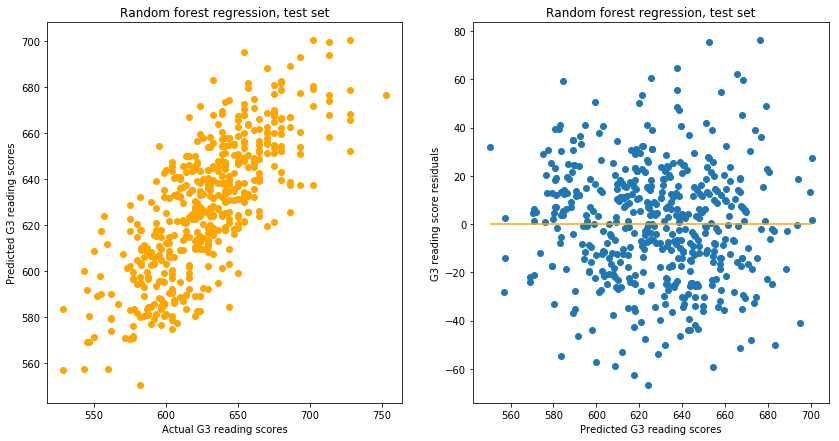

In [29]:
rfr3tt = ensemble.RandomForestRegressor(n_estimators=50, max_features=feature_options[np.argmax(rfy_r)], random_state=0)
rfr3tt.fit(X_train_rfr, y_train_rfr)

print('Mean squared error:', metrics.mean_squared_error(rfr3tt.predict(X_test_rfr), y_test_rfr))

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination:', rfr3tt.score(X_test_rfr, y_test_rfr))

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(y_test_rfr, rfr3tt.predict(X_test_rfr), color='orange')
axes[0].set_xlabel('Actual G3 reading scores')
axes[0].set_ylabel('Predicted G3 reading scores')
axes[0].set_title('Random forest regression, test set')

axes[1].scatter(rfr3tt.predict(X_test_rfr), (y_test_rfr - rfr3tt.predict(X_test_rfr)))
axes[1].hlines(y = 0, xmin=rfr3tt.predict(X_test_rfr).min(), xmax=rfr3tt.predict(X_test_rfr).max(), color='orange')
axes[1].set_xlabel('Predicted G3 reading scores')
axes[1].set_ylabel('G3 reading score residuals')
axes[1].set_title('Random forest regression, test set')

plt.show()

In [30]:
rfy_m = np.zeros(3)

X_train_rfm, X_test_rfm, y_train_rfm, y_test_rfm = ms.train_test_split(dataK3pred, dataK3resp['g3tmathss'], test_size=0.25, random_state=0)

for i in range(len(feature_options)):
    t = ensemble.RandomForestRegressor(n_estimators=50, max_features=feature_options[i], random_state=0)
    t.fit(X_train_rfm, y_train_rfm)
    rfy_m[i] = np.mean(ms.cross_val_score(t, X_train_rfm, y_train_rfm))

print('Mean score on training set, 3-fold CV, all:', rfy_m[0])
print('Mean score on training set, 3-fold CV, square root:', rfy_m[1])
print('Mean score on training set, 3-fold CV, log2:', rfy_m[2])
print('Maximum score: {} with option {}'.format(max(rfy_m), np.argmax(rfy_m) + 1))

Mean score on training set, 3-fold CV, all: 0.589895803812
Mean score on training set, 3-fold CV, square root: 0.599881981463
Mean score on training set, 3-fold CV, log2: 0.590791507712
Maximum score: 0.599881981463089 with option 2


Mean squared error: 694.749115746
Coefficient of determination: 0.568650164696


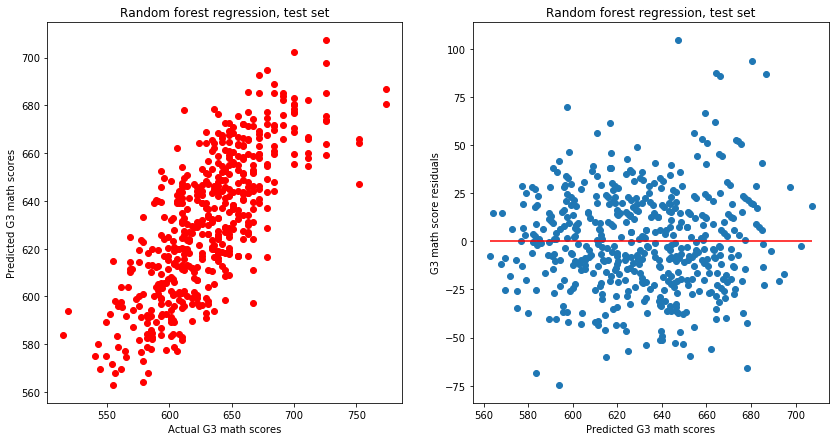

In [31]:
rfm3tt = ensemble.RandomForestRegressor(n_estimators=50, max_features=feature_options[np.argmax(rfy_m)], random_state=0)
rfm3tt.fit(X_train_rfm, y_train_rfm)

print('Mean squared error:', metrics.mean_squared_error(rfm3tt.predict(X_test_rfm), y_test_rfm))

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination:', rfm3tt.score(X_test_rfm, y_test_rfm))

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(y_test_rfm, rfm3tt.predict(X_test_rfm), color='r')
axes[0].set_xlabel('Actual G3 math scores')
axes[0].set_ylabel('Predicted G3 math scores')
axes[0].set_title('Random forest regression, test set')

axes[1].scatter(rfm3tt.predict(X_test_rfm), (y_test_rfm - rfm3tt.predict(X_test_rfm)))
axes[1].hlines(y = 0, xmin=rfm3tt.predict(X_test_rfm).min(), xmax=rfm3tt.predict(X_test_rfm).max(), color='r')
axes[1].set_xlabel('Predicted G3 math scores')
axes[1].set_ylabel('G3 math score residuals')
axes[1].set_title('Random forest regression, test set')

plt.show()

In [32]:
rfy_l = np.zeros(3)

X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = ms.train_test_split(dataK3pred, dataK3resp['g3tlstnss'], test_size=0.25, random_state=0)

for i in range(len(feature_options)):
    t = ensemble.RandomForestRegressor(n_estimators=50, max_features=feature_options[i], random_state=0)
    t.fit(X_train_rfl, y_train_rfl)
    rfy_l[i] = np.mean(ms.cross_val_score(t, X_train_rfl, y_train_rfl))

print('Mean score on training set, 3-fold CV, all:', rfy_l[0])
print('Mean score on training set, 3-fold CV, square root:', rfy_l[1])
print('Mean score on training set, 3-fold CV, log2:', rfy_l[2])
print('Maximum score: {} with option {}'.format(max(rfy_l), np.argmax(rfy_l) + 1))

Mean score on training set, 3-fold CV, all: 0.605517829572
Mean score on training set, 3-fold CV, square root: 0.596989642177
Mean score on training set, 3-fold CV, log2: 0.583229766336
Maximum score: 0.6055178295715589 with option 1


Mean squared error: 432.170753374
Coefficient of determination: 0.552193233874


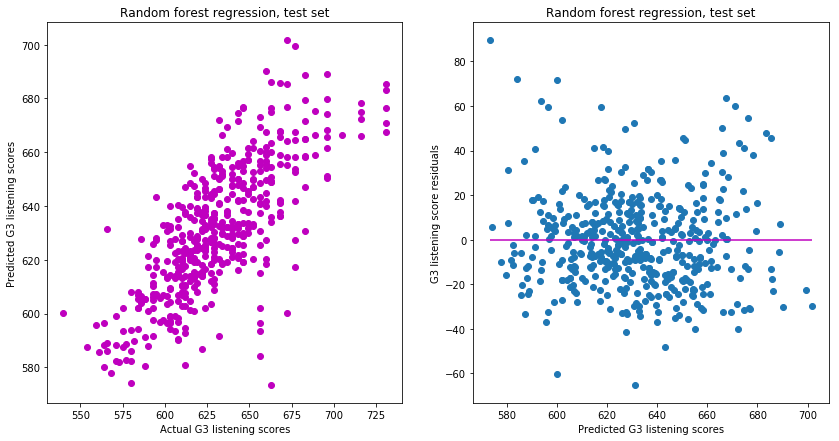

In [33]:
rfl3tt = ensemble.RandomForestRegressor(n_estimators=50, max_features=feature_options[np.argmax(rfy_l)], random_state=0)
rfl3tt.fit(X_train_rfl, y_train_rfl)

print('Mean squared error:', metrics.mean_squared_error(rfl3tt.predict(X_test_rfl), y_test_rfl))

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination:', rfl3tt.score(X_test_rfl, y_test_rfl))

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(y_test_rfl, rfl3tt.predict(X_test_rfl), color='m')
axes[0].set_xlabel('Actual G3 listening scores')
axes[0].set_ylabel('Predicted G3 listening scores')
axes[0].set_title('Random forest regression, test set')

axes[1].scatter(rfl3tt.predict(X_test_rfl), (y_test_rfl - rfl3tt.predict(X_test_rfl)))
axes[1].hlines(y = 0, xmin=rfl3tt.predict(X_test_rfl).min(), xmax=rfl3tt.predict(X_test_rfl).max(), color='m')
axes[1].set_xlabel('Predicted G3 listening scores')
axes[1].set_ylabel('G3 listening score residuals')
axes[1].set_title('Random forest regression, test set')

plt.show()

In [34]:
rfy_w = np.zeros(3)

X_train_rfw, X_test_rfw, y_train_rfw, y_test_rfw = ms.train_test_split(dataK3pred, dataK3resp['g3twordss'], test_size=0.25, random_state=0)

for i in range(len(feature_options)):
    t = ensemble.RandomForestRegressor(n_estimators=50, max_features=feature_options[i], random_state=0)
    t.fit(X_train_rfw, y_train_rfw)
    rfy_w[i] = np.mean(ms.cross_val_score(t, X_train_rfw, y_train_rfw))

print('Mean score on training set, 3-fold CV, all:', rfy_w[0])
print('Mean score on training set, 3-fold CV, square root:', rfy_w[1])
print('Mean score on training set, 3-fold CV, log2:', rfy_w[2])
print('Maximum score: {} with option {}'.format(max(rfy_w), np.argmax(rfy_w) + 1))

Mean score on training set, 3-fold CV, all: 0.495030025442
Mean score on training set, 3-fold CV, square root: 0.496319017323
Mean score on training set, 3-fold CV, log2: 0.486458182266
Maximum score: 0.49631901732335787 with option 2


Mean squared error: 994.002305112
Coefficient of determination: 0.469447390546


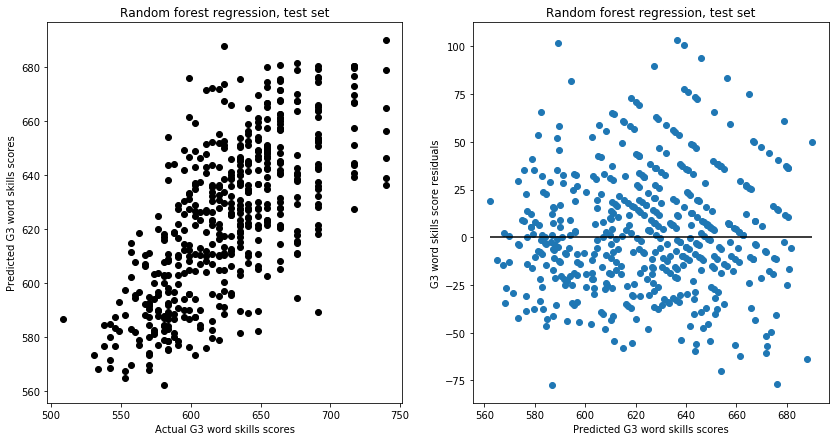

In [35]:
rfw3tt = ensemble.RandomForestRegressor(n_estimators=50, max_features=feature_options[np.argmax(rfy_w)], random_state=0)
rfw3tt.fit(X_train_rfw, y_train_rfw)

print('Mean squared error:', metrics.mean_squared_error(rfw3tt.predict(X_test_rfw), y_test_rfw))

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination:', rfw3tt.score(X_test_rfw, y_test_rfw))

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(y_test_rfw, rfw3tt.predict(X_test_rfw), color='black')
axes[0].set_xlabel('Actual G3 word skills scores')
axes[0].set_ylabel('Predicted G3 word skills scores')
axes[0].set_title('Random forest regression, test set')

axes[1].scatter(rfw3tt.predict(X_test_rfw), (y_test_rfw - rfw3tt.predict(X_test_rfw)))
axes[1].hlines(y = 0, xmin=rfw3tt.predict(X_test_rfw).min(), xmax=rfw3tt.predict(X_test_rfw).max(), color='black')
axes[1].set_xlabel('Predicted G3 word skills scores')
axes[1].set_ylabel('G3 word skills score residuals')
axes[1].set_title('Random forest regression, test set')

plt.show()